In [2]:
import pysftp
import os 
import numpy as np
import pandas as pd
import netCDF4
import numpy as np

from scipy import io
from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from dotenv import load_dotenv   #for python-dotenv method
from datetime import datetime

/Users/joaojesus/opt/anaconda3/envs/geo_plotting/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [21]:
import calendar

years = [year for year in range(2017,2021+1)]
months = [1, 2, 3, 4, 10, 11, 12]


dates = []
year_days_dict = {}
for year in years:
    days_per_month = []
    for month in months:
        days_in_month = calendar.monthrange(year, month)[1]
        days_per_month.append(days_in_month)
        total_days = sum(days_per_month)
        year_days_dict[year] = total_days

        for day in range(1, days_in_month + 1):
        # Create date object for the current day
            date_str = f'{day}/{month}/{year}'
            date_obj = datetime.strptime(date_str, '%d/%m/%Y')
            
            # Add the date object to the list
            dates.append(date_obj)


year_days_dict

{2017: 212, 2018: 212, 2019: 212, 2020: 213, 2021: 212}

In [27]:
ds = netCDF4.Dataset('DO_NOT_DELETE_era5_2017_2021.nc')

np.savetxt("COORDINATES_ERA5_ONLINE/COORDINATES_ERA5_ONLINE_LON.csv", ds['longitude'], delimiter=",")
np.savetxt("COORDINATES_ERA5_ONLINE/COORDINATES_ERA5_ONLINE_LAT.csv", ds['latitude'], delimiter=",")
np.shape(ds['u'])

(1061, 241, 1440)

In [36]:
wind_eastward = ds['u']
np.shape(wind_eastward)


(1061, 241, 1440)

In [37]:
potential_vorticity = ds['pv']
np.shape(potential_vorticity)


(1061, 241, 1440)

In [38]:
relative_humidity = ds['r'] # RELATIVE_HUMIDITY
np.shape(relative_humidity)


(1061, 241, 1440)

In [39]:
specific_humidy = ds['q']
np.shape(specific_humidy)


(1061, 241, 1440)

In [40]:
temperature = ds['t']
np.shape(temperature)


(1061, 241, 1440)

In [41]:
wind_eastward = ds['u']
np.shape(wind_eastward)


(1061, 241, 1440)

In [42]:
wind_northward = ds['v']
np.shape(wind_northward)

(1061, 241, 1440)

In [43]:
vertical_velocity = ds['w']
np.shape(vertical_velocity)

(1061, 241, 1440)

In [44]:
for i in range(np.shape(ds['u'])[0]):
    potential_vorticity = ds['pv'][i] # POTENTIAL_VORTICITY
    relative_humidity = ds['r'][i] # RELATIVE_HUMIDITY
    specific_humidy = ds['q'][i] # SPECIFIC_HUMIDTY
    temperature = ds['t'][i] # TEMPERATURE
    wind_eastward = ds['u'][i] # WIND_EASTWARD
    wind_northward = ds['v'][i] # WIND_NORTHWARD
    vertical_velocity = ds['w'][i] # VERTICAL_VELOCITY

    np.savetxt(f"PROCESSED_ERA5_ONLINE/POTENTIAL_VORTICITY/{dates[i].strftime(('%d-%m-%Y'))}.csv", potential_vorticity, delimiter=",")
    np.savetxt(f"PROCESSED_ERA5_ONLINE/RELATIVE_HUMIDITY/{dates[i].strftime(('%d-%m-%Y'))}.csv", relative_humidity, delimiter=",")
    np.savetxt(f"PROCESSED_ERA5_ONLINE/SPECIFIC_HUMIDTY/{dates[i].strftime(('%d-%m-%Y'))}.csv", specific_humidy, delimiter=",")
    np.savetxt(f"PROCESSED_ERA5_ONLINE/TEMPERATURE/{dates[i].strftime(('%d-%m-%Y'))}.csv", temperature, delimiter=",")
    np.savetxt(f"PROCESSED_ERA5_ONLINE/WIND_EASTWARD{dates[i].strftime(('%d-%m-%Y'))}.csv", wind_eastward, delimiter=",")
    np.savetxt(f"PROCESSED_ERA5_ONLINE/WIND_NORTHWARD/{dates[i].strftime(('%d-%m-%Y'))}.csv", wind_northward, delimiter=",")
    np.savetxt(f"PROCESSED_ERA5_ONLINE/VERTICAL_VELOCITY/{dates[i].strftime(('%d-%m-%Y'))}.csv", vertical_velocity, delimiter=",")



FileNotFoundError: [Errno 2] No such file or directory: 'PROCESSED_ERA5_ONLINE/POTENTIAL_VORTICITY/01-01-2017.csv'

In [6]:
len(wind_eastward)

212

In [7]:
np.shape(wind_eastward)

(212, 241, 1440)

In [8]:
wind_eastward_2017_jan_01 = wind_eastward[0]

In [11]:
grid = map_grid(grid_size=None, source = 'era5_online')
wizard = data_wizard()

select_area_indexer = grid.select_area_indexer(
    min_lat= 59,
    max_lat= 61,
    min_lon= -180,
    max_lon= 180)

data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = wind_eastward_2017_jan_01)


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_13668/1643838491.py:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(grid.grid_[0], grid.grid_[1], data,latlon=True, cmap='RdBu_r',shading='auto')


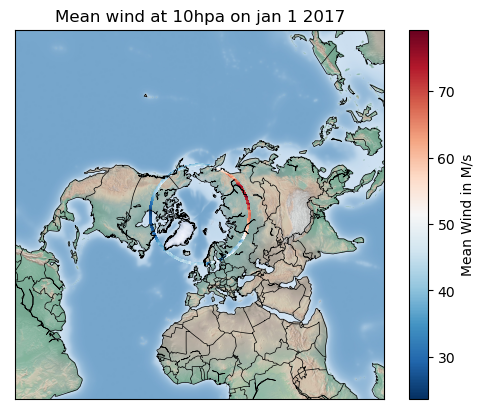

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure()
# fig, axes = plt.subplots(1, 2)

# axes[0].set_title("2018")
m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.grid_[0], grid.grid_[1], data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Mean wind at 10hpa on jan 1 2017')
plt.colorbar(label='Mean Wind in M/s')